In [1]:
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [2]:
plt.rc("figure", figsize=(10, 8))

# Data investigation

In [3]:
data = pd.read_csv("phones.csv")
data

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


In [4]:
data.describe()

,disk,price,year
count,100.000000,100.000000,100.000000
mean,217.280000,8111.530000,2014.220000
std,193.812055,3540.401993,2.401935
min,16.000000,1435.000000,2010.000000
25%,64.000000,5349.250000,2013.000000
50%,128.000000,7890.500000,2015.000000
75%,512.000000,10358.250000,2016.000000
max,512.000000,15842.000000,2018.000000


In [5]:
data.describe(include=[object])

,os
count,100
unique,2
top,Android
freq,53


In [6]:
data.disk.value_counts().sort_index()

16     12
32     11
64     21
128     9
256    21
512    26
Name: disk, dtype: int64

In [7]:
data.eval('''
    is_ios     = (os == "iOS").astype("int")
    is_android = (os == "Android").astype("int")
''', inplace=True)
data

,disk,os,price,year,is_ios,is_android
0,64,Android,7256,2016,0,1
1,128,Android,7623,2015,0,1
2,64,Android,1916,2010,0,1
3,512,iOS,15045,2017,1,0
4,16,Android,4478,2013,0,1
...,...,...,...,...,...,...
95,512,iOS,8398,2011,1,0
96,64,Android,7197,2016,0,1
97,32,Android,5694,2014,0,1
98,32,Android,7589,2016,0,1


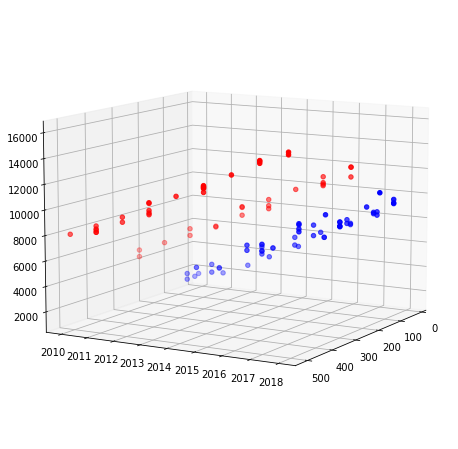

In [8]:
androids = data.query("is_android == 1")
iphones = data.query("is_ios == 1")

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(xs=androids.disk, ys=androids.year, zs=androids.price, c="b");
ax.scatter(xs=iphones.disk, ys=iphones.year, zs=iphones.price, c="r");

ax.view_init(10, 30)

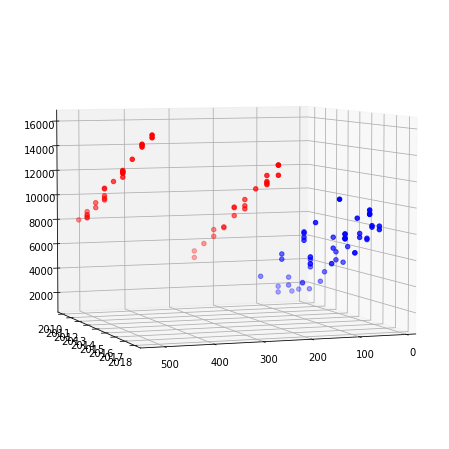

In [9]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(xs=androids.disk, ys=androids.year, zs=androids.price, c="b");
ax.scatter(xs=iphones.disk, ys=iphones.year, zs=iphones.price, c="r");

ax.view_init(5, 70)

# Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression().fit(data[["disk", "year", "is_ios", "is_android"]], data["price"])

In [12]:
Y_pred = model.predict(data[["disk", "year", "is_ios", "is_android"]][:10])
Y_pred

array([ 7664.43620643,  7316.34382022,  1588.92592837, 14728.54488443,
        4128.3115723 , 15741.12993078,  7316.34382022,  4626.6810674 ,
       12703.37479175,  6651.85116008])

In [13]:
Y = data["price"][:10]
Y

0     7256
1     7623
2     1916
3    15045
4     4478
5    15842
6     7191
7     4277
8    12797
9     6256
Name: price, dtype: int64

In [14]:
Y_pred - Y

0    408.436206
1   -306.656180
2   -327.074072
3   -316.455116
4   -349.688428
5   -100.870069
6    125.343820
7    349.681067
8    -93.625208
9    395.851160
Name: price, dtype: float64

# Classification

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_pred, Y)

90388.7945877021

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(data[["disk", "price"]], data[["is_ios", "year"]])

In [17]:
model.predict(data[0:10][["disk", "price"]]) == data[:10][["is_ios", "year"]]

,is_ios,year
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [18]:
model.feature_importances_

array([0.3650408, 0.6349592])

# Clustrering

In [19]:
from sklearn.cluster import KMeans

In [56]:
X = data[["disk", "price"]]
X = X / X.max()
# X = X.applymap(np.log)
X

,disk,price
0,0.12500,0.458023
1,0.25000,0.481189
2,0.12500,0.120944
3,1.00000,0.949691
4,0.03125,0.282666
...,...,...
95,1.00000,0.530110
96,0.12500,0.454299
97,0.06250,0.359424
98,0.06250,0.479043


In [57]:
model = KMeans(2).fit(X)

In [58]:
clusters = model.predict(X)
clusters

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [59]:
model.cluster_centers_

array([[0.825     , 0.72187539],
       [0.15729167, 0.37212789]])

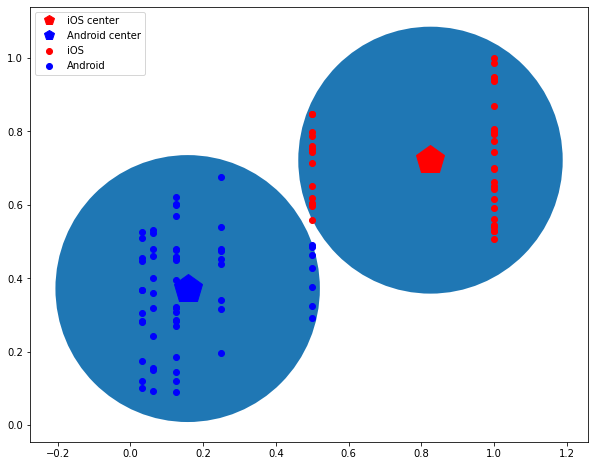

In [60]:
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
from matplotlib.lines import Line2D

def get_r(cluster):
    return max(
        np.linalg.norm(np.array(model.cluster_centers_[0]) - np.array(x))
        for x in cluster.itertuples(False)
    )

fig = plt.figure()

ax = fig.gca()

label1 = data[clusters == 0].os.mode()[0]
scatter1 = ax.scatter(X[clusters == 0]["disk"], X[clusters == 0]["price"], c="r", label=label1);
center1, = ax.plot(*model.cluster_centers_[0], "rp", ms=30, label=f"{label1} center")
ax.add_patch(plt.Circle(model.cluster_centers_[0], get_r(X[clusters == 0]), zorder=-1))

label2 = data[clusters == 1].os.mode()[0]
scatter2 = ax.scatter(X[clusters == 1]["disk"], X[clusters == 1]["price"], c="b", label=label2)
center2, = ax.plot(*model.cluster_centers_[1], "bp", ms=30, label=f"{label2} center")
ax.add_patch(plt.Circle(model.cluster_centers_[1], get_r(X[clusters == 0]), zorder=-1))

def update(handle, orig):
    handle.update_from(orig)
    handle.set_markersize(10)

plt.legend(handler_map={Line2D: HandlerLine2D(update_func=update)});

Не так хорошо kmeans работает по двум параметрам, как только по диску. На графиках выше видно, что iOS от Андройн хорошо отделяется по размеру диска (256 и выше — iOS). Применять kmeans "влоб" некорректно, так масштабы шкал "диск" и "цена" различаются. И сложно предать какой-то интуитивный смысл евклидовому расстоянию в таком пространстве.

Можно пошаманить со шкалой disk, чтобы найти достаточно "хорошую" проекцию на ось в евклидовом пространстве:

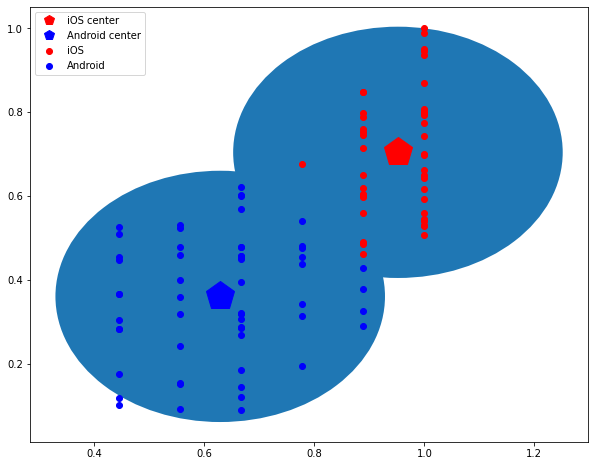

In [78]:
X = data[["disk", "price"]]
X = X.eval("""
    disk = log(disk) / log(disk.max())
    price = price / price.max()
""")
# X = X.applymap(np.log)

model = KMeans(2).fit(X)
clusters = model.predict(X)

fig = plt.figure()

ax = fig.gca()

label1 = data[clusters == 0].os.mode()[0]
scatter1 = ax.scatter(X[clusters == 0]["disk"], X[clusters == 0]["price"], c="r", label=label1);
center1, = ax.plot(*model.cluster_centers_[0], "rp", ms=30, label=f"{label1} center")
ax.add_patch(plt.Circle(model.cluster_centers_[0], get_r(X[clusters == 0]), zorder=-1))

label2 = data[clusters == 1].os.mode()[0]
scatter2 = ax.scatter(X[clusters == 1]["disk"], X[clusters == 1]["price"], c="b", label=label2)
center2, = ax.plot(*model.cluster_centers_[1], "bp", ms=30, label=f"{label2} center")
ax.add_patch(plt.Circle(model.cluster_centers_[1], get_r(X[clusters == 0]), zorder=-1))


plt.legend(handler_map={Line2D: HandlerLine2D(update_func=update)});

Еще попытка:

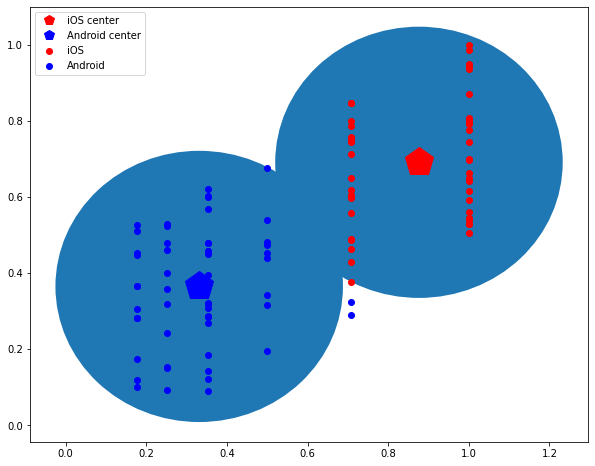

In [79]:
X = data[["disk", "price"]]
X = X.eval("""
    disk = sqrt(disk) / sqrt(disk.max())
    price = price / price.max()
""")
# X = X.applymap(np.log)

model = KMeans(2).fit(X)
clusters = model.predict(X)

fig = plt.figure()

ax = fig.gca()

label1 = data[clusters == 0].os.mode()[0]
scatter1 = ax.scatter(X[clusters == 0]["disk"], X[clusters == 0]["price"], c="r", label=label1);
center1, = ax.plot(*model.cluster_centers_[0], "rp", ms=30, label=f"{label1} center")
ax.add_patch(plt.Circle(model.cluster_centers_[0], get_r(X[clusters == 0]), zorder=-1))

label2 = data[clusters == 1].os.mode()[0]
scatter2 = ax.scatter(X[clusters == 1]["disk"], X[clusters == 1]["price"], c="b", label=label2)
center2, = ax.plot(*model.cluster_centers_[1], "bp", ms=30, label=f"{label2} center")
ax.add_patch(plt.Circle(model.cluster_centers_[1], get_r(X[clusters == 0]), zorder=-1))


plt.legend(handler_map={Line2D: HandlerLine2D(update_func=update)});

sqrt(disk) помог приблизить телефоны с диском 256 к телефонам с 512 и отодвинуть их от телефонов с 128 и меньше. Шаманство. Надо быть аккурантее со шкалами и расстоянием.